___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Ana Rosaura Zamarrón Álvarez </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `ana.zamarron@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

In [1]:
#from IPython.display import Image
#Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Solo tenemos categóricos

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser sigmoidal para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 0.6579 - accuracy: 0.6350
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6500 - accuracy: 0.6406
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6462
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6536
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6667
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6648
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6704
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6816
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6909
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6965
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7840
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.7840
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7840
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7858
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.7840
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.7840
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7877
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7877
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7914
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7877
Epoch 176/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

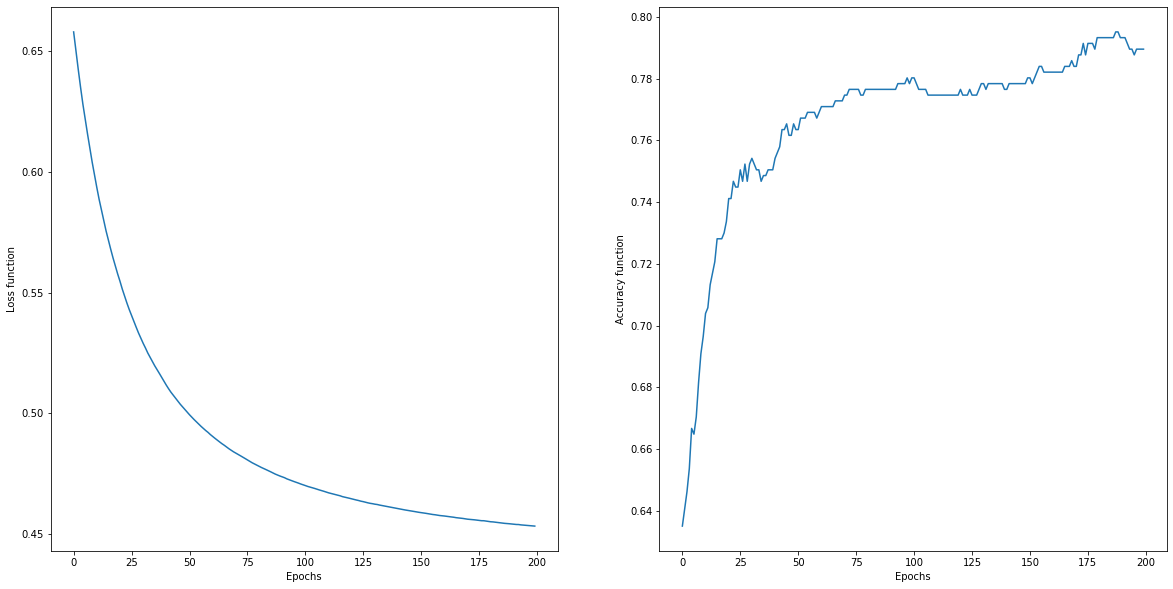

In [9]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'),plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')
# entre más grande mejor

In [10]:
#Usar el modelo para predecir
Y_prob = model.predict(X_test)
Y_pred = Y_pred = np.round(Y_prob).astype(int)

In [11]:
Y_pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
Y_prob

array([[0.37466043],
       [0.152369  ],
       [0.10205624],
       [0.12893814],
       [0.59357435],
       [0.56102943],
       [0.02701139],
       [0.66137916],
       [0.62741804],
       [0.84949374],
       [0.18084899],
       [0.8863471 ],
       [0.38948345],
       [0.36155015],
       [0.07444495],
       [0.3848403 ],
       [0.10932389],
       [0.06588739],
       [0.8402077 ],
       [0.63936996],
       [0.21423334],
       [0.06859565],
       [0.28404853],
       [0.07408151],
       [0.4600203 ],
       [0.8485944 ],
       [0.09908721],
       [0.04842937],
       [0.23240563],
       [0.11792773],
       [0.8820285 ],
       [0.8628324 ],
       [0.8218551 ],
       [0.86142206],
       [0.4775046 ],
       [0.6546434 ],
       [0.7862252 ],
       [0.2992296 ],
       [0.42594865],
       [0.72363096],
       [0.05920142],
       [0.6865806 ],
       [0.5477828 ],
       [0.36568466],
       [0.04352114],
       [0.61299956],
       [0.662982  ],
       [0.176

In [13]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.7403
[0.5141646862030029, 0.7402597665786743]


In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.round(Y_proba).astype(int)

accu_train = accuracy_score(Y_train, Y_pred)
prec_train = precision_score(Y_train, Y_pred)
reca_train = recall_score(Y_train, Y_pred)

Y_proba= model.predict(X_test)
Y_pred= np.round(Y_proba).astype(int)

accu_test = accuracy_score(Y_test, Y_pred)
prec_test = precision_score(Y_test, Y_pred)
reca_test = recall_score(Y_test, Y_pred)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.790 	 0.739 	 0.617
 Test 	 0.740 	 0.628 	 0.613


In [15]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [16]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD

In [17]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
dummy_y = np_utils.to_categorical(Y).astype(int)

In [21]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [22]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,))) #tanh
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy']) # en la otra red neutronal era mse

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
2/2 [==============================] - 1s 165ms/step - loss: 2.2490 - accuracy: 0.2083 - val_loss: 1.0657 - val_accuracy: 0.3000
Epoch 2/200
2/2 [==============================] - 0s 51ms/step - loss: 1.0717 - accuracy: 0.3583 - val_loss: 0.7888 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 52ms/step - loss: 0.7985 - accuracy: 0.6333 - val_loss: 0.7272 - val_accuracy: 0.6667
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 0.7003 - accuracy: 0.6333 - val_loss: 0.5210 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 40ms/step - loss: 0.5324 - accuracy: 0.7250 - val_loss: 0.4468 - val_accuracy: 0.8667
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 0.4269 - accuracy: 0.9083 - val_loss: 0.3987 - val_accuracy: 0.7667
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 0.4180 - accuracy: 0.7083 - val_loss: 0.3989 - val_accuracy: 0.7333
Epoch 8/200
2/2 [==

Epoch 59/200
2/2 [==============================] - 0s 35ms/step - loss: 0.2735 - accuracy: 0.9167 - val_loss: 0.1783 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 0s 30ms/step - loss: 0.2085 - accuracy: 0.9417 - val_loss: 0.1632 - val_accuracy: 0.9333
Epoch 61/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1883 - accuracy: 0.9167 - val_loss: 0.1638 - val_accuracy: 0.9333
Epoch 62/200
2/2 [==============================] - 0s 58ms/step - loss: 0.1889 - accuracy: 0.9167 - val_loss: 0.1478 - val_accuracy: 0.9333
Epoch 63/200
2/2 [==============================] - 0s 38ms/step - loss: 0.1253 - accuracy: 0.9667 - val_loss: 0.1331 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1383 - accuracy: 0.9500 - val_loss: 0.3033 - val_accuracy: 0.8333
Epoch 65/200
2/2 [==============================] - 0s 55ms/step - loss: 0.2015 - accuracy: 0.9167 - val_loss: 0.1536 - val_accuracy: 0.9333
Epoch 66/200


Epoch 117/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0681 - accuracy: 0.9833 - val_loss: 0.1535 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 27ms/step - loss: 0.0904 - accuracy: 0.9500 - val_loss: 0.0809 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0785 - accuracy: 0.9917 - val_loss: 0.1870 - val_accuracy: 0.8667
Epoch 120/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1021 - accuracy: 0.9500 - val_loss: 0.1034 - val_accuracy: 0.9333
Epoch 121/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0719 - accuracy: 0.9667 - val_loss: 0.0689 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0971 - accuracy: 0.9667 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0729 - accuracy: 0.9750 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 

Epoch 175/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0960 - accuracy: 0.9917 - val_loss: 0.0882 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0925 - accuracy: 0.9750 - val_loss: 0.0864 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0974 - accuracy: 0.9750 - val_loss: 0.1190 - val_accuracy: 0.9333
Epoch 178/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1035 - accuracy: 0.9583 - val_loss: 0.1227 - val_accuracy: 0.9333
Epoch 179/200
2/2 [==============================] - 0s 57ms/step - loss: 0.1027 - accuracy: 0.9583 - val_loss: 0.0773 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 27ms/step - loss: 0.0867 - accuracy: 0.9750 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0838 - accuracy: 0.9917 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 

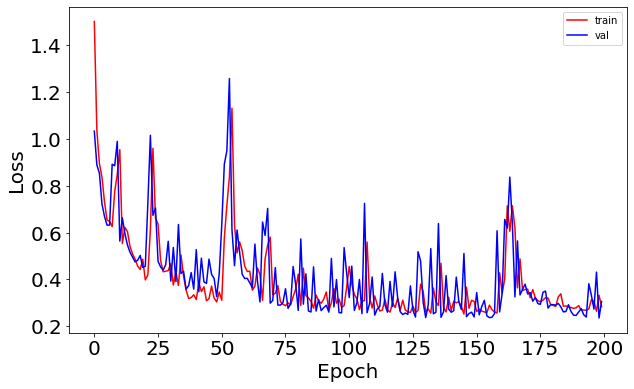

In [24]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [25]:
#Predecir con el modelo
Y_prob = model.predict(X)
Y_pred = np.round(Y_prob).astype(int)


In [26]:
Y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [27]:
#Evaluar el modelo
#score = model.evaluate(X, dummy_y,verbose=1)
#print(score)

score = model.evaluate(X_test,y_test)
print(score)

1/1 [==============================] - 0s 25ms/step - loss: 0.0938 - accuracy: 0.9667
[0.09378151595592499, 0.9666666388511658]


In [28]:
# UNA R^2 DE 1 SIGNIFICA QUE SE SOBREAJUSTÓ, ESTÁ PREDICIENDO DEMASIADO BIEN

In [29]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [30]:
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

In [33]:
accu_train = accuracy_score(y_train,model.predict(X_train,Yhat))
prec_train = precision_score(y_train,model.predict(X_train,Yhat))
reca_train = recall_score(y_train,model.predict(X_train,Yhat),average='weighted')

accu_test = accuracy_score(y_test,model.predict(X_test,Yhat))
prec_test = precision_score(y_test,model.predict(X_test,Yhat),average='weighted')
reca_test = recall_score(y_test,model.predict(X_test,Yhat),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

NameError: name 'X_train' is not defined

+ Entonces no conviene utilizar una regresion logística, porque se sobreajusta demasiado bien a los datos.
+ Entonces también 